# Task 4: Predicting Customer Churn in Telecom


In [10]:
import micropip
await micropip.install('seaborn')
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import joblib


In [11]:

# Load dataset
df = pd.read_csv("Telco_Customer_Churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


##  Data Preprocessing
- Handle missing values
- Encode categorical variables
- Scale numerical features

In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Drop 'customerID' column if it exists
if "customerID" in df.columns:
    df = df.drop("customerID", axis=1)

#  Convert 'TotalCharges' to numeric and fill missing values
if "TotalCharges" in df.columns:
    df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
    df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())

#  Encode binary categorical columns safely
binary_cols = ["Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn"]
for col in binary_cols:
    if col in df.columns:
        df[col] = LabelEncoder().fit_transform(df[col].astype(str))

#  One-hot encode remaining categorical columns
df = pd.get_dummies(df, drop_first=True)

#  Scale numerical columns if they exist
scaler = StandardScaler()
scaled_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
for col in scaled_cols:
    if col in df.columns:
        df[col] = scaler.fit_transform(df[[col]])

#  Preview the processed DataFrame
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Male,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,-1.277445,0,1,-1.160323,-0.994242,0,False,...,False,False,False,False,False,False,False,False,True,False
1,0,0,0,0.066327,1,0,-0.259629,-0.173244,0,True,...,False,False,False,False,False,True,False,False,False,True
2,0,0,0,-1.236724,1,1,-0.362660,-0.959674,1,True,...,False,False,False,False,False,False,False,False,False,True
3,0,0,0,0.514251,0,0,-0.746535,-0.194766,0,True,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,-1.236724,1,1,0.197365,-0.940470,1,False,...,False,False,False,False,False,False,False,False,True,False


##  Train-Test Split

In [14]:

X = df.drop("Churn", axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##  Logistic Regression Model

In [15]:

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))


Logistic Regression Accuracy: 0.8211497515968772


##  Random Forest Model

In [16]:

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.7984386089425124


##  Model Evaluation

Classification Report - Random Forest:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      1036
           1       0.67      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.79      0.80      0.79      1409



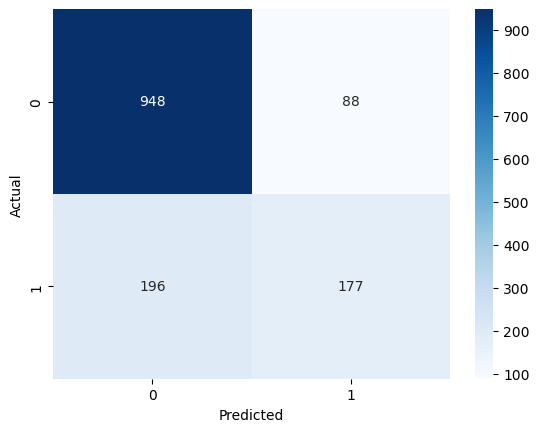

In [17]:

print("Classification Report - Random Forest:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


##  Feature Importance (Random Forest)

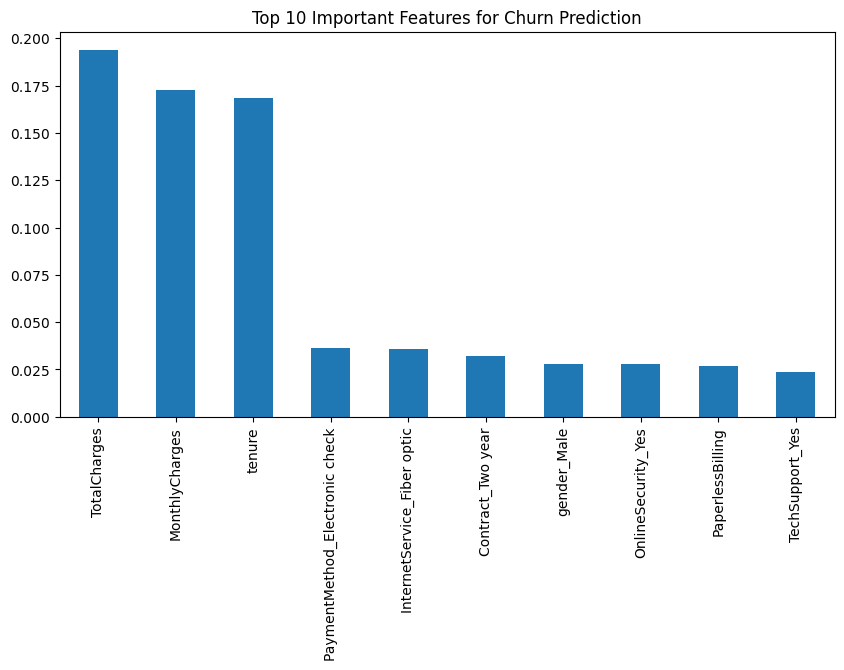

In [18]:

importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False)[:10].plot(kind='bar', figsize=(10,5))
plt.title("Top 10 Important Features for Churn Prediction")
plt.show()


##  Save the Trained Model

In [19]:

joblib.dump(rf_model, "churn_model.pkl")


['churn_model.pkl']